In [ ]:
## In this notebook, we try to learn by fixing pcn--1UQC

In [1]:
import numpy as np
import pandas as pd

from catboost import Pool, CatBoostRegressor

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [2]:
df = pd.read_csv("pharmacy_new.csv")

In [3]:
df =df.drop(columns=['tx_date', 'drug', 'bin', 'diagnosis_letter', 'diagnosis_number','Unnamed: 0'])

In [4]:
df = df[df['rejected'] == False]
df = df.drop(columns='rejected')

In [5]:
pcn = df['pcn'].unique()
pcn

array(['1UQC', nan, 'KB38N', 'S76J7V6', '327CKV', 'CS8580', 'MSCXSG',
       'NC7EN', 'KBOSN', '3O71UTS', 'ZQPX', 'T52GV', 'N098KI', 'DY4B',
       'AZUO5U', 'RM0HB', 'BIZF', 'RAM3J', 'TAZ5W', 'WM6A', 'J5DT8',
       'W1LW9Y', 'OO0E', 'BZ22Z2', 'RB7UU', 'P4LC', '6ZGS97C', 'T17LNK',
       'TPJD', 'REGLCC', 'YICC41', 'XH4T3', '7THOQ5', 'YFVIA', 'CG3ZWQ',
       'IF448', 'NG4CS', '2TIC', '9D24', 'MQWH09H', '393U', 'YL5CMT',
       '9FU70', '3Y5ZW0', 'ULM7G', 'W7L3', '9C5MOR3', 'K5KDJ7G', 'FX2Z'],
      dtype=object)

In [8]:
df_1UQC = df[df['pcn']=='1UQC']

Series([], Name: group, dtype: int64)

In [10]:
df_1UQC['group'].value_counts()

Series([], Name: group, dtype: int64)

In [14]:
df_1UQC =df_1UQC.drop(columns=['group','pcn'])

In [15]:
train, test = train_test_split(df_1UQC, test_size=0.2, shuffle=True, random_state=42)

In [16]:
train_data = train.drop(columns=['patient_pay'])
train_label = train['patient_pay']

In [17]:
train_data.columns

Index(['pharmacy', 'diagnosis', 'brand', 'drug_name', 'month'], dtype='object')

In [18]:
train_pool = Pool(train_data, train_label, cat_features = list(range(5)))

In [24]:
model = CatBoostRegressor(iterations =900, 
                         depth = 10,
                         learning_rate=1,
                         loss_function = 'RMSE')
model.fit(train_pool)

0:	learn: 24.9010837	total: 228ms	remaining: 3m 24s
1:	learn: 23.5787393	total: 444ms	remaining: 3m 19s
2:	learn: 22.8122538	total: 759ms	remaining: 3m 46s
3:	learn: 22.4930336	total: 1.08s	remaining: 4m 2s
4:	learn: 21.7409327	total: 1.43s	remaining: 4m 16s
5:	learn: 21.1822013	total: 1.61s	remaining: 3m 59s
6:	learn: 21.1094961	total: 1.91s	remaining: 4m 4s
7:	learn: 20.7763629	total: 2.2s	remaining: 4m 5s
8:	learn: 20.7590969	total: 2.44s	remaining: 4m 1s
9:	learn: 20.4602406	total: 2.67s	remaining: 3m 57s
10:	learn: 20.3357705	total: 2.85s	remaining: 3m 50s
11:	learn: 20.1983202	total: 3.06s	remaining: 3m 46s
12:	learn: 19.8946367	total: 3.29s	remaining: 3m 44s
13:	learn: 19.7322244	total: 3.51s	remaining: 3m 42s
14:	learn: 19.5106797	total: 3.7s	remaining: 3m 38s
15:	learn: 19.4156127	total: 3.9s	remaining: 3m 35s
16:	learn: 19.3742862	total: 4.11s	remaining: 3m 33s
17:	learn: 19.3244005	total: 4.33s	remaining: 3m 32s
18:	learn: 19.2967369	total: 4.55s	remaining: 3m 30s
19:	learn:

155:	learn: 15.0058159	total: 32.3s	remaining: 2m 33s
156:	learn: 14.9424886	total: 32.5s	remaining: 2m 33s
157:	learn: 14.9397644	total: 32.7s	remaining: 2m 33s
158:	learn: 14.9219844	total: 32.9s	remaining: 2m 33s
159:	learn: 14.9156964	total: 33.1s	remaining: 2m 33s
160:	learn: 14.9100560	total: 33.3s	remaining: 2m 32s
161:	learn: 14.8996065	total: 33.5s	remaining: 2m 32s
162:	learn: 14.8911301	total: 33.7s	remaining: 2m 32s
163:	learn: 14.8868917	total: 33.9s	remaining: 2m 32s
164:	learn: 14.8847080	total: 34.1s	remaining: 2m 32s
165:	learn: 14.8467926	total: 34.3s	remaining: 2m 31s
166:	learn: 14.8306387	total: 34.5s	remaining: 2m 31s
167:	learn: 14.8130778	total: 34.6s	remaining: 2m 30s
168:	learn: 14.8010341	total: 34.8s	remaining: 2m 30s
169:	learn: 14.7859841	total: 35s	remaining: 2m 30s
170:	learn: 14.7837814	total: 35.1s	remaining: 2m 29s
171:	learn: 14.7707025	total: 35.3s	remaining: 2m 29s
172:	learn: 14.7675250	total: 35.5s	remaining: 2m 29s
173:	learn: 14.7314098	total: 

310:	learn: 12.8588596	total: 1m 3s	remaining: 2m
311:	learn: 12.8429210	total: 1m 3s	remaining: 2m
312:	learn: 12.8407227	total: 1m 4s	remaining: 2m
313:	learn: 12.8352440	total: 1m 4s	remaining: 1m 59s
314:	learn: 12.8238217	total: 1m 4s	remaining: 1m 59s
315:	learn: 12.8227916	total: 1m 4s	remaining: 1m 59s
316:	learn: 12.8206886	total: 1m 4s	remaining: 1m 59s
317:	learn: 12.8162837	total: 1m 5s	remaining: 1m 59s
318:	learn: 12.8139368	total: 1m 5s	remaining: 1m 59s
319:	learn: 12.8087736	total: 1m 5s	remaining: 1m 58s
320:	learn: 12.7997505	total: 1m 5s	remaining: 1m 58s
321:	learn: 12.7933497	total: 1m 5s	remaining: 1m 58s
322:	learn: 12.7898975	total: 1m 6s	remaining: 1m 58s
323:	learn: 12.7785256	total: 1m 6s	remaining: 1m 57s
324:	learn: 12.7755532	total: 1m 6s	remaining: 1m 57s
325:	learn: 12.7732300	total: 1m 6s	remaining: 1m 57s
326:	learn: 12.7674242	total: 1m 6s	remaining: 1m 57s
327:	learn: 12.7626100	total: 1m 7s	remaining: 1m 57s
328:	learn: 12.7514903	total: 1m 7s	rema

461:	learn: 11.7151177	total: 1m 34s	remaining: 1m 29s
462:	learn: 11.7108857	total: 1m 34s	remaining: 1m 29s
463:	learn: 11.7060808	total: 1m 34s	remaining: 1m 28s
464:	learn: 11.7044526	total: 1m 34s	remaining: 1m 28s
465:	learn: 11.6847512	total: 1m 35s	remaining: 1m 28s
466:	learn: 11.6846271	total: 1m 35s	remaining: 1m 28s
467:	learn: 11.6788201	total: 1m 35s	remaining: 1m 28s
468:	learn: 11.6556780	total: 1m 35s	remaining: 1m 27s
469:	learn: 11.6481120	total: 1m 35s	remaining: 1m 27s
470:	learn: 11.6430071	total: 1m 36s	remaining: 1m 27s
471:	learn: 11.6383940	total: 1m 36s	remaining: 1m 27s
472:	learn: 11.6357389	total: 1m 36s	remaining: 1m 27s
473:	learn: 11.6328966	total: 1m 36s	remaining: 1m 26s
474:	learn: 11.6278122	total: 1m 36s	remaining: 1m 26s
475:	learn: 11.6156206	total: 1m 36s	remaining: 1m 26s
476:	learn: 11.6114050	total: 1m 37s	remaining: 1m 26s
477:	learn: 11.6036697	total: 1m 37s	remaining: 1m 26s
478:	learn: 11.6020531	total: 1m 37s	remaining: 1m 25s
479:	learn

612:	learn: 10.7048900	total: 2m 5s	remaining: 58.6s
613:	learn: 10.6995447	total: 2m 5s	remaining: 58.4s
614:	learn: 10.6987209	total: 2m 5s	remaining: 58.2s
615:	learn: 10.6944831	total: 2m 5s	remaining: 58s
616:	learn: 10.6924243	total: 2m 5s	remaining: 57.8s
617:	learn: 10.6896138	total: 2m 6s	remaining: 57.6s
618:	learn: 10.6820347	total: 2m 6s	remaining: 57.4s
619:	learn: 10.6813811	total: 2m 6s	remaining: 57.2s
620:	learn: 10.6751574	total: 2m 6s	remaining: 57s
621:	learn: 10.6622848	total: 2m 7s	remaining: 56.8s
622:	learn: 10.6602864	total: 2m 7s	remaining: 56.6s
623:	learn: 10.6521417	total: 2m 7s	remaining: 56.4s
624:	learn: 10.6448069	total: 2m 7s	remaining: 56.2s
625:	learn: 10.6422600	total: 2m 7s	remaining: 56s
626:	learn: 10.6415769	total: 2m 8s	remaining: 55.8s
627:	learn: 10.6380452	total: 2m 8s	remaining: 55.6s
628:	learn: 10.6370257	total: 2m 8s	remaining: 55.4s
629:	learn: 10.6231609	total: 2m 8s	remaining: 55.2s
630:	learn: 10.6140835	total: 2m 9s	remaining: 55s
6

766:	learn: 10.0376449	total: 2m 38s	remaining: 27.4s
767:	learn: 10.0331687	total: 2m 38s	remaining: 27.2s
768:	learn: 10.0206141	total: 2m 38s	remaining: 27s
769:	learn: 10.0172045	total: 2m 38s	remaining: 26.8s
770:	learn: 10.0124343	total: 2m 39s	remaining: 26.6s
771:	learn: 10.0090536	total: 2m 39s	remaining: 26.4s
772:	learn: 10.0085387	total: 2m 39s	remaining: 26.2s
773:	learn: 10.0071707	total: 2m 39s	remaining: 26s
774:	learn: 10.0044745	total: 2m 39s	remaining: 25.8s
775:	learn: 10.0018292	total: 2m 40s	remaining: 25.6s
776:	learn: 10.0005799	total: 2m 40s	remaining: 25.4s
777:	learn: 9.9969630	total: 2m 40s	remaining: 25.2s
778:	learn: 9.9954768	total: 2m 40s	remaining: 25s
779:	learn: 9.9948912	total: 2m 40s	remaining: 24.8s
780:	learn: 9.9937341	total: 2m 41s	remaining: 24.5s
781:	learn: 9.9926483	total: 2m 41s	remaining: 24.3s
782:	learn: 9.9896295	total: 2m 41s	remaining: 24.1s
783:	learn: 9.9857224	total: 2m 41s	remaining: 23.9s
784:	learn: 9.9752592	total: 2m 41s	remai

In [27]:
test_data = test.drop(columns=['patient_pay'])
test_label = test['patient_pay']
preds=model.predict(test_data)
diff = abs(preds - test_label)
diff.describe()

count    1.082880e+05
mean     3.898920e+00
std      1.877349e+01
min      5.252854e-07
25%      9.953334e-02
50%      3.148873e-01
75%      1.308661e+00
max      4.787781e+02
Name: patient_pay, dtype: float64

In [28]:
np.percentile(diff, 90), np.percentile(diff, 95), np.percentile(diff, 98), np.percentile(diff, 99), np.percentile(diff, 100)

(5.8484461807380566,
 14.562391837764721,
 37.36148171603372,
 73.06035585626809,
 478.77805892376097)

In [30]:
model2 = CatBoostRegressor(iterations =999, 
                         depth = 13,
                         learning_rate=1,
                         loss_function = 'RMSE')
model2.fit(train_pool)

0:	learn: 24.4277105	total: 451ms	remaining: 7m 30s
1:	learn: 23.2182873	total: 898ms	remaining: 7m 27s
2:	learn: 21.5839137	total: 1.4s	remaining: 7m 43s
3:	learn: 20.4286747	total: 1.83s	remaining: 7m 36s
4:	learn: 20.2065317	total: 2.35s	remaining: 7m 46s
5:	learn: 19.4689410	total: 2.82s	remaining: 7m 46s
6:	learn: 19.4682698	total: 2.96s	remaining: 7m
7:	learn: 19.3042378	total: 3.27s	remaining: 6m 45s
8:	learn: 19.1401478	total: 3.61s	remaining: 6m 37s
9:	learn: 19.0269666	total: 4.06s	remaining: 6m 41s
10:	learn: 18.9412325	total: 4.43s	remaining: 6m 37s
11:	learn: 18.9049499	total: 4.85s	remaining: 6m 38s
12:	learn: 18.7791735	total: 5.26s	remaining: 6m 38s
13:	learn: 18.1485032	total: 5.77s	remaining: 6m 46s
14:	learn: 18.0674713	total: 6.09s	remaining: 6m 39s
15:	learn: 17.7789691	total: 6.45s	remaining: 6m 36s
16:	learn: 17.5983246	total: 6.83s	remaining: 6m 34s
17:	learn: 17.5049928	total: 7.2s	remaining: 6m 32s
18:	learn: 17.4286977	total: 7.55s	remaining: 6m 29s
19:	learn

156:	learn: 9.8282290	total: 56.4s	remaining: 5m 2s
157:	learn: 9.8212070	total: 56.7s	remaining: 5m 1s
158:	learn: 9.7861461	total: 57.1s	remaining: 5m 1s
159:	learn: 9.7390715	total: 57.5s	remaining: 5m 1s
160:	learn: 9.7320029	total: 57.8s	remaining: 5m
161:	learn: 9.6874323	total: 58.1s	remaining: 5m
162:	learn: 9.6678511	total: 58.5s	remaining: 5m
163:	learn: 9.6461451	total: 58.9s	remaining: 4m 59s
164:	learn: 9.6142931	total: 59.2s	remaining: 4m 59s
165:	learn: 9.6052621	total: 59.6s	remaining: 4m 59s
166:	learn: 9.5933809	total: 59.9s	remaining: 4m 58s
167:	learn: 9.5851150	total: 1m	remaining: 4m 58s
168:	learn: 9.5710789	total: 1m	remaining: 4m 57s
169:	learn: 9.5608128	total: 1m 1s	remaining: 4m 57s
170:	learn: 9.5530412	total: 1m 1s	remaining: 4m 57s
171:	learn: 9.5341733	total: 1m 1s	remaining: 4m 56s
172:	learn: 9.4950071	total: 1m 2s	remaining: 4m 56s
173:	learn: 9.4908550	total: 1m 2s	remaining: 4m 56s
174:	learn: 9.4821717	total: 1m 2s	remaining: 4m 55s
175:	learn: 9.4

310:	learn: 7.2818215	total: 1m 50s	remaining: 4m 5s
311:	learn: 7.2754741	total: 1m 51s	remaining: 4m 4s
312:	learn: 7.2711326	total: 1m 51s	remaining: 4m 4s
313:	learn: 7.2676698	total: 1m 51s	remaining: 4m 4s
314:	learn: 7.2522575	total: 1m 52s	remaining: 4m 3s
315:	learn: 7.2201962	total: 1m 52s	remaining: 4m 3s
316:	learn: 7.2115303	total: 1m 53s	remaining: 4m 3s
317:	learn: 7.2101566	total: 1m 53s	remaining: 4m 2s
318:	learn: 7.2007848	total: 1m 53s	remaining: 4m 2s
319:	learn: 7.1979258	total: 1m 54s	remaining: 4m 2s
320:	learn: 7.1873822	total: 1m 54s	remaining: 4m 2s
321:	learn: 7.1535347	total: 1m 54s	remaining: 4m 1s
322:	learn: 7.1517137	total: 1m 55s	remaining: 4m 1s
323:	learn: 7.1503541	total: 1m 55s	remaining: 4m
324:	learn: 7.1457987	total: 1m 55s	remaining: 4m
325:	learn: 7.1250402	total: 1m 56s	remaining: 4m
326:	learn: 7.1211189	total: 1m 56s	remaining: 3m 59s
327:	learn: 7.1058632	total: 1m 57s	remaining: 3m 59s
328:	learn: 7.1005990	total: 1m 57s	remaining: 3m 59s

463:	learn: 6.1750846	total: 2m 46s	remaining: 3m 12s
464:	learn: 6.1736502	total: 2m 47s	remaining: 3m 11s
465:	learn: 6.1705687	total: 2m 47s	remaining: 3m 11s
466:	learn: 6.1679514	total: 2m 47s	remaining: 3m 11s
467:	learn: 6.1672596	total: 2m 47s	remaining: 3m 10s
468:	learn: 6.1365442	total: 2m 48s	remaining: 3m 10s
469:	learn: 6.1221199	total: 2m 48s	remaining: 3m 9s
470:	learn: 6.0921281	total: 2m 49s	remaining: 3m 9s
471:	learn: 6.0856559	total: 2m 49s	remaining: 3m 9s
472:	learn: 6.0775202	total: 2m 49s	remaining: 3m 8s
473:	learn: 6.0699768	total: 2m 50s	remaining: 3m 8s
474:	learn: 6.0682434	total: 2m 50s	remaining: 3m 8s
475:	learn: 6.0596654	total: 2m 50s	remaining: 3m 7s
476:	learn: 6.0579350	total: 2m 51s	remaining: 3m 7s
477:	learn: 6.0539022	total: 2m 51s	remaining: 3m 7s
478:	learn: 6.0521533	total: 2m 52s	remaining: 3m 6s
479:	learn: 6.0411696	total: 2m 52s	remaining: 3m 6s
480:	learn: 6.0311833	total: 2m 52s	remaining: 3m 6s
481:	learn: 6.0286850	total: 2m 53s	rema

617:	learn: 5.3117928	total: 3m 43s	remaining: 2m 17s
618:	learn: 5.3053307	total: 3m 44s	remaining: 2m 17s
619:	learn: 5.3025235	total: 3m 44s	remaining: 2m 17s
620:	learn: 5.2996172	total: 3m 44s	remaining: 2m 16s
621:	learn: 5.2987583	total: 3m 45s	remaining: 2m 16s
622:	learn: 5.2922976	total: 3m 45s	remaining: 2m 16s
623:	learn: 5.2892388	total: 3m 45s	remaining: 2m 15s
624:	learn: 5.2889523	total: 3m 46s	remaining: 2m 15s
625:	learn: 5.2876109	total: 3m 46s	remaining: 2m 15s
626:	learn: 5.2874816	total: 3m 46s	remaining: 2m 14s
627:	learn: 5.2844802	total: 3m 47s	remaining: 2m 14s
628:	learn: 5.2836644	total: 3m 47s	remaining: 2m 13s
629:	learn: 5.2811813	total: 3m 47s	remaining: 2m 13s
630:	learn: 5.2752692	total: 3m 48s	remaining: 2m 13s
631:	learn: 5.2722666	total: 3m 48s	remaining: 2m 12s
632:	learn: 5.2710861	total: 3m 48s	remaining: 2m 12s
633:	learn: 5.2700877	total: 3m 49s	remaining: 2m 11s
634:	learn: 5.2249917	total: 3m 49s	remaining: 2m 11s
635:	learn: 5.2146170	total:

771:	learn: 4.7381261	total: 4m 39s	remaining: 1m 22s
772:	learn: 4.7356772	total: 4m 39s	remaining: 1m 21s
773:	learn: 4.7334253	total: 4m 40s	remaining: 1m 21s
774:	learn: 4.7283934	total: 4m 40s	remaining: 1m 21s
775:	learn: 4.7278835	total: 4m 40s	remaining: 1m 20s
776:	learn: 4.7269167	total: 4m 41s	remaining: 1m 20s
777:	learn: 4.7263620	total: 4m 41s	remaining: 1m 19s
778:	learn: 4.6929914	total: 4m 42s	remaining: 1m 19s
779:	learn: 4.6929585	total: 4m 42s	remaining: 1m 19s
780:	learn: 4.6874629	total: 4m 42s	remaining: 1m 18s
781:	learn: 4.6650279	total: 4m 43s	remaining: 1m 18s
782:	learn: 4.6523124	total: 4m 43s	remaining: 1m 18s
783:	learn: 4.6513220	total: 4m 43s	remaining: 1m 17s
784:	learn: 4.6471921	total: 4m 44s	remaining: 1m 17s
785:	learn: 4.6448654	total: 4m 44s	remaining: 1m 17s
786:	learn: 4.6361196	total: 4m 44s	remaining: 1m 16s
787:	learn: 4.6352061	total: 4m 45s	remaining: 1m 16s
788:	learn: 4.6334117	total: 4m 45s	remaining: 1m 16s
789:	learn: 4.6278054	total:

927:	learn: 4.2896092	total: 5m 37s	remaining: 25.8s
928:	learn: 4.2895890	total: 5m 37s	remaining: 25.4s
929:	learn: 4.2891682	total: 5m 38s	remaining: 25.1s
930:	learn: 4.2891661	total: 5m 38s	remaining: 24.7s
931:	learn: 4.2890894	total: 5m 38s	remaining: 24.4s
932:	learn: 4.2858406	total: 5m 39s	remaining: 24s
933:	learn: 4.2774001	total: 5m 39s	remaining: 23.6s
934:	learn: 4.2733152	total: 5m 40s	remaining: 23.3s
935:	learn: 4.2712998	total: 5m 40s	remaining: 22.9s
936:	learn: 4.2710109	total: 5m 40s	remaining: 22.5s
937:	learn: 4.2693745	total: 5m 41s	remaining: 22.2s
938:	learn: 4.2680008	total: 5m 41s	remaining: 21.8s
939:	learn: 4.2673972	total: 5m 41s	remaining: 21.5s
940:	learn: 4.2665557	total: 5m 42s	remaining: 21.1s
941:	learn: 4.2599985	total: 5m 42s	remaining: 20.7s
942:	learn: 4.2573960	total: 5m 42s	remaining: 20.4s
943:	learn: 4.2509435	total: 5m 43s	remaining: 20s
944:	learn: 4.2500856	total: 5m 43s	remaining: 19.6s
945:	learn: 4.2494055	total: 5m 44s	remaining: 19.

In [31]:
preds2=model2.predict(test_data)
diff2 = abs(preds2 - test_label)
diff2.describe()

count    108288.000000
mean          3.933548
std          19.739808
min           0.000008
25%           0.068473
50%           0.226950
75%           1.113305
max         658.668415
Name: patient_pay, dtype: float64

[]

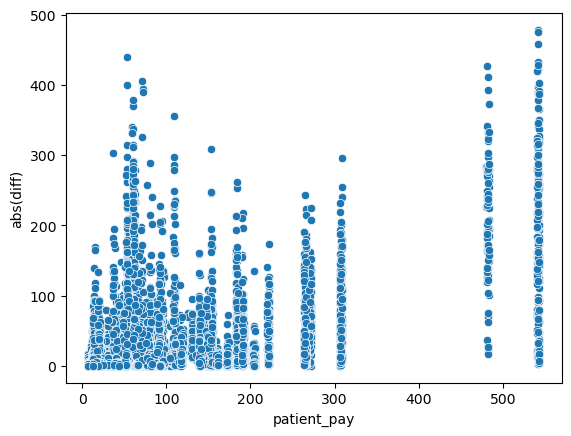

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

dplot1 =sns.scatterplot(x=test_label, y=abs(diff))
dplot1.set(xlabel='patient_pay', ylabel='abs(diff)')
plt.plot()

(array([9.8206e+04, 4.0300e+03, 1.8580e+03, 1.0650e+03, 6.6200e+02,
        3.8800e+02, 3.2000e+02, 1.9700e+02, 1.7300e+02, 1.2400e+02,
        1.0300e+02, 9.0000e+01, 8.1000e+01, 7.9000e+01, 8.0000e+01,
        6.0000e+01, 5.8000e+01, 5.5000e+01, 4.7000e+01, 4.7000e+01,
        3.8000e+01, 3.1000e+01, 3.9000e+01, 2.9000e+01, 2.8000e+01,
        2.5000e+01, 1.4000e+01, 2.3000e+01, 2.4000e+01, 1.6000e+01,
        1.8000e+01, 1.7000e+01, 1.8000e+01, 1.5000e+01, 1.5000e+01,
        1.2000e+01, 1.7000e+01, 1.5000e+01, 1.6000e+01, 9.0000e+00,
        9.0000e+00, 9.0000e+00, 8.0000e+00, 9.0000e+00, 9.0000e+00,
        7.0000e+00, 6.0000e+00, 5.0000e+00, 7.0000e+00, 8.0000e+00,
        5.0000e+00, 7.0000e+00, 1.0000e+00, 8.0000e+00, 2.0000e+00,
        6.0000e+00, 4.0000e+00, 5.0000e+00, 0.0000e+00, 6.0000e+00,
        2.0000e+00, 0.0000e+00, 1.0000e+00, 5.0000e+00, 1.0000e+00,
        1.0000e+00, 3.0000e+00, 1.0000e+00, 3.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 1.00

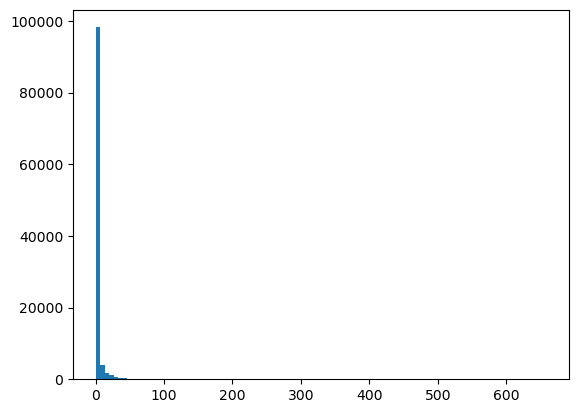

In [35]:
plt.hist(diff2, bins=100)

In [36]:
np.percentile(diff2, 90), np.percentile(diff2, 95), np.percentile(diff2, 98), np.percentile(diff2, 99), np.percentile(diff2, 100)

(5.9319772926682335,
 14.995735392330728,
 37.68463157279787,
 78.0712695116191,
 658.668414543193)

In [37]:
df_1UQC['patient_pay'].describe()

count    541437.000000
mean         31.989067
std          50.760662
min           7.390000
25%          13.390000
50%          13.390000
75%          21.980000
max         543.400000
Name: patient_pay, dtype: float64